In [3]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2
from skimage.feature import canny
from skimage import filters
from skimage.morphology import erosion, dilation, opening, closing , skeletonize , remove_small_objects
from skimage.morphology import disk
from skimage import io, img_as_ubyte
import warnings

/home/iman/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Proccessing 9 Ultrasound Images

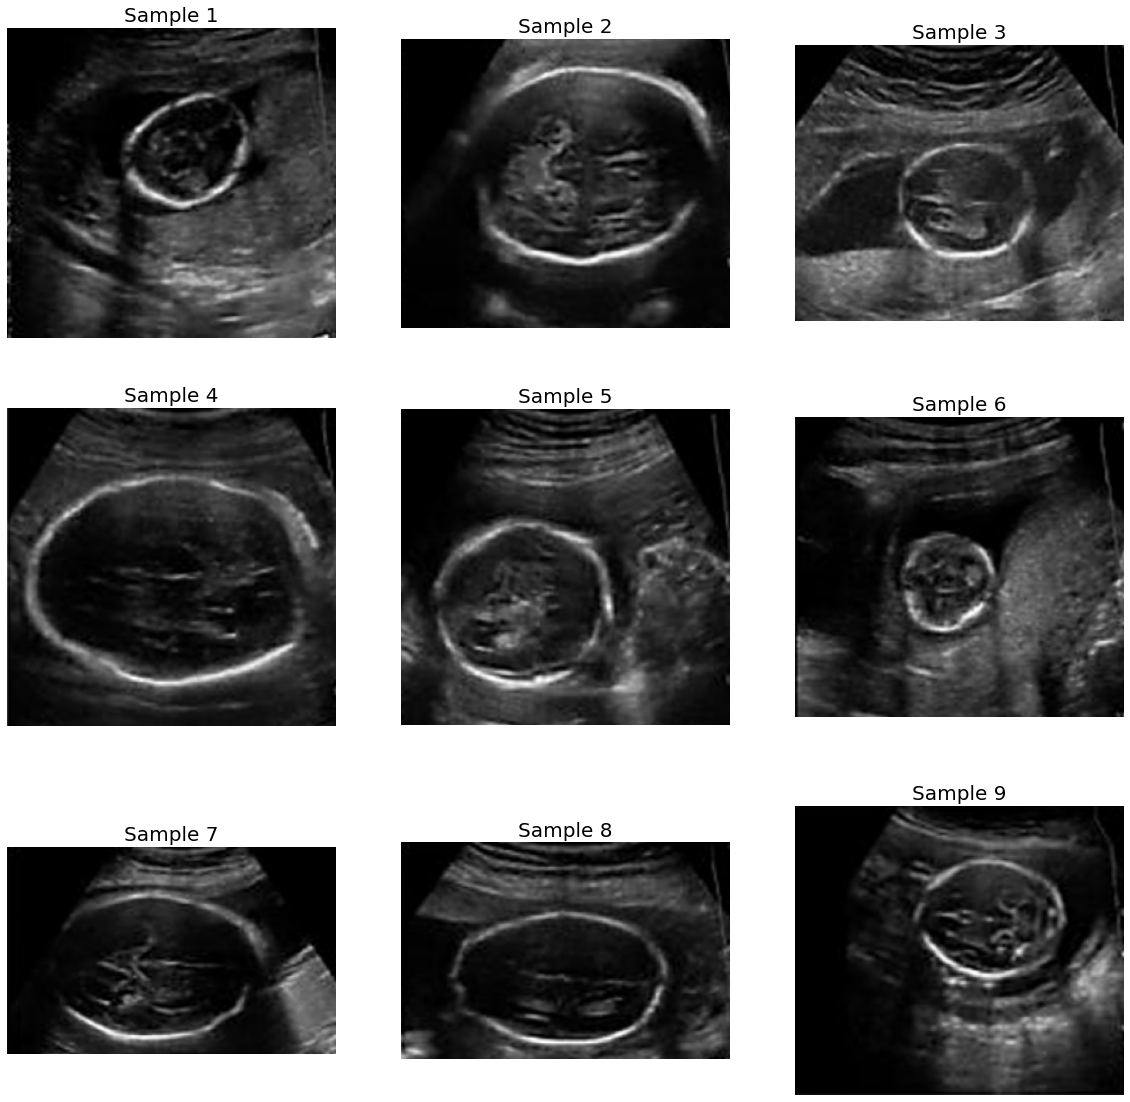

In [7]:
nameImage = ['sample_img1.PNG', 'sample_img2.PNG', 'sample_img3.PNG', 'sample_img4.PNG' ,'sample_img5.PNG',
            'sample_img6.PNG', 'sample_img7.PNG', 'sample_img8.PNG', 'sample_img9.PNG' ]
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
for i in range(3):
    for j in range(3):
        
        idx = i * 3 + j
        image = cv2.imread(nameImage[idx])
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        ax[i][j].imshow(gray, cmap='gray')
        num = str(idx+1)
        ax[i][j].set_title("Sample " +num , fontsize=20)
       
        
        ax[i][j].axis('off')


plt.show()


# Canny detection, Morphological operations, Binarization, and Skeletonization

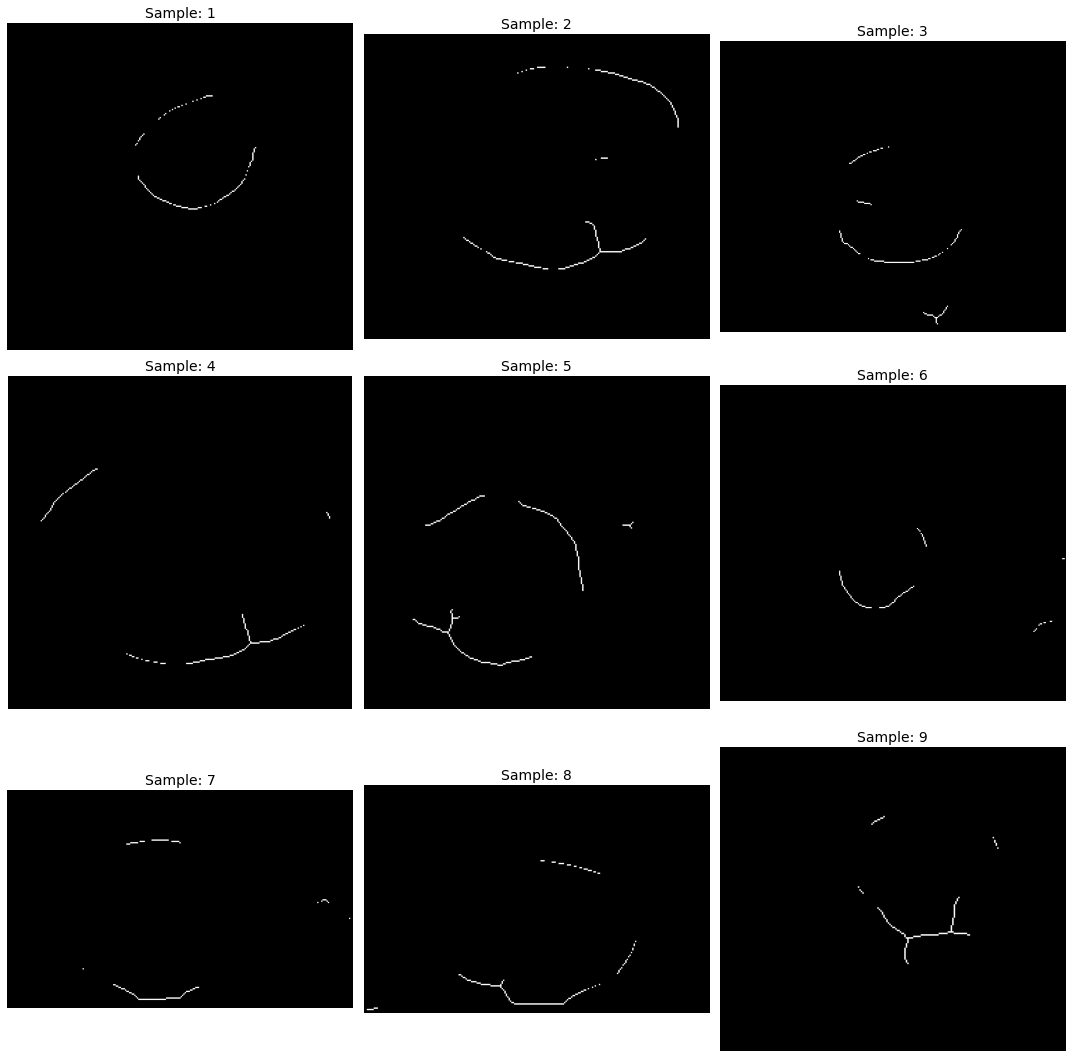

In [13]:

# Suppress expected warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)


result_Skeleton = []
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        idx = i * 3 + j
        image = cv2.imread(nameImage[idx])
        
        if image is None:
            print(f"Error: Could not load image {nameImage[idx]}")
            continue

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.blur(gray, (5, 5))

        edge_canny = canny(blurred, low_threshold=100, high_threshold=160)
        dil = dilation(edge_canny, disk(14))
        res = remove_small_objects(dil, min_size=300)
        res = erosion(res, disk(17))

        thresh = threshold_otsu(res)
        binary = res > thresh
        skeleton = skeletonize(binary)

        name_image = f"image_result{idx}.png"
        result_Skeleton.append(name_image)

        array_img = img_as_ubyte(skeleton)
        io.imsave(name_image, array_img)

        ax[i][j].imshow(skeleton, cmap='gray')
        ax[i][j].set_title(f"Sample: {idx+1}", fontsize=14)
        ax[i][j].axis('off')

plt.tight_layout()
plt.show()


# Perform Contour Detection and elipse Drawing

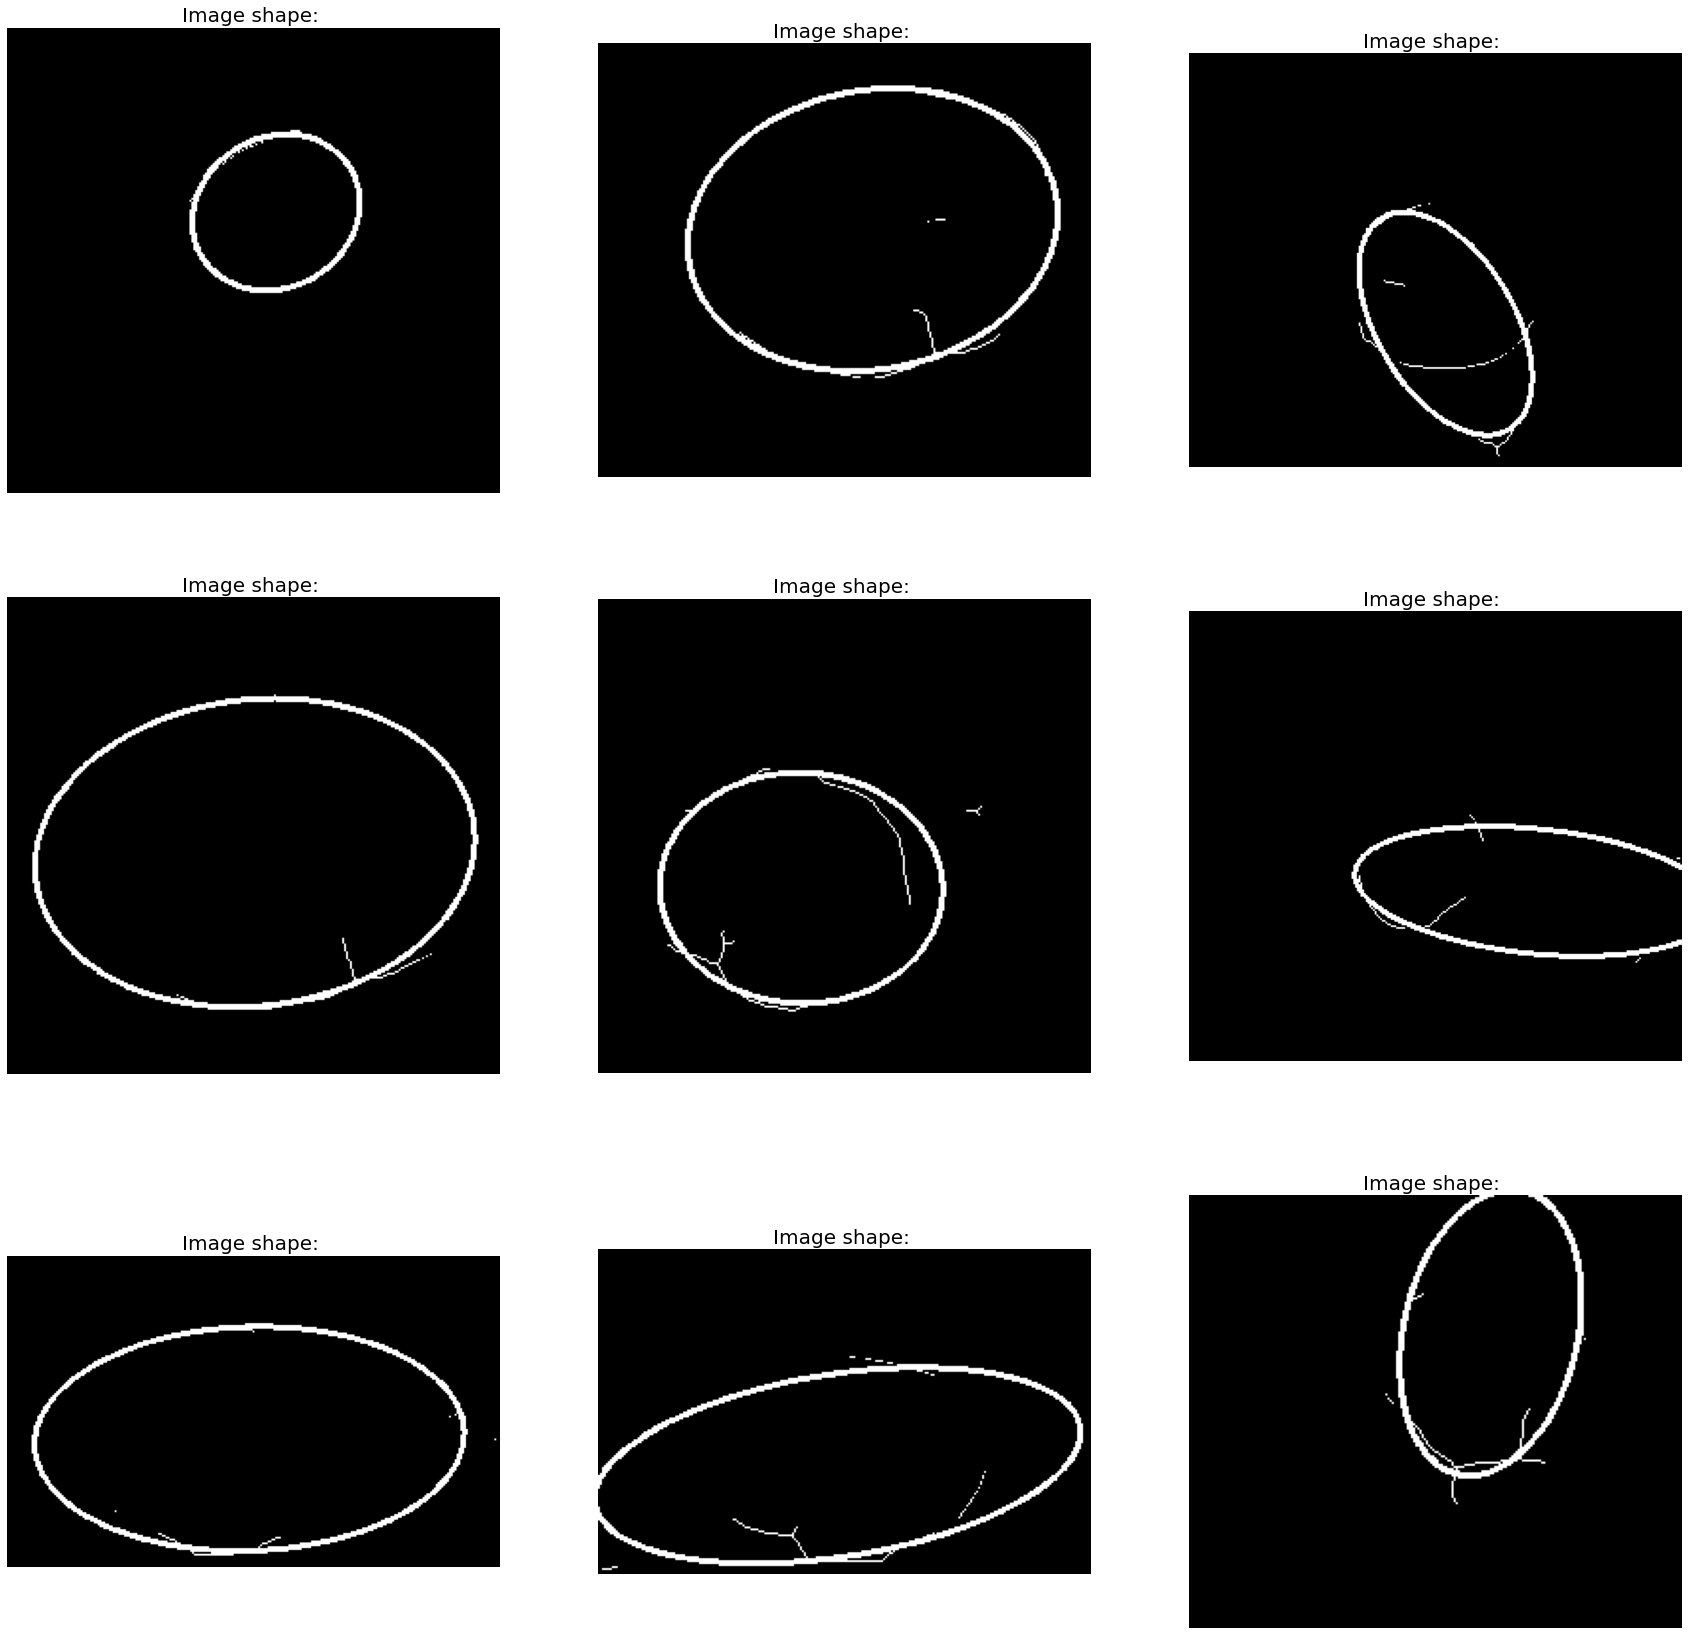

In [14]:
list_PBD = []
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(30, 30))
for i in range(3):
    for j in range(3):
        
        idx = i * 3 + j
        image = cv2.imread(result_Skeleton[idx],0)
        # Find contours in the binary image
        contours, _ = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
        combine = np.concatenate(contours, axis=0)
        
        ellipse = cv2.fitEllipse(combine)
        # Draw the ellipse on the original image
        cv2.ellipse(image, ellipse, (255, 255, 255), 2)
        # Get the major and minor axis lengths from the ellipse values
        major_axis = max(ellipse[1])
        minor_axis = min(ellipse[1])

        ax[i][j].imshow(image, cmap='gray')
        ax[i][j].set_title("Image shape: " , fontsize=20)
        ax[i][j].axis('off')
        # Convert the pixel-to-millimeter conversion factor
        pixel_to_mm = 0.38
        
        diameter1_mm = major_axis * pixel_to_mm
        diameter2_mm = minor_axis * pixel_to_mm
        list_PBD.append(diameter1_mm)
        

plt.show()


### Reference Table of Biparietal Diameter Growth Rate Table (BPD) 
https://www.researchgate.net/figure/Biparietal-Diameter-Growth-Rate-Table_tbl10_14718580

In [15]:
def BPD_weeks_table(BPD):
    week= 0
    if BPD>= 19.4 and BPD<=22.5:
        week= 12
    elif BPD> 22.5 and BPD<=26.5:
        week= 13
    elif BPD> 26.5 and BPD<=30.5:
        week= 14
    elif BPD> 30.5 and BPD<=34.8:
        week= 15
    elif BPD>34.8 and BPD<=38.4:
        week= 16
    elif BPD> 38.4 and BPD<=41.5:
        week= 17
    elif BPD> 41.5 and BPD<=45:
        week= 18
    elif BPD> 45 and BPD<=48.4:
        week= 19
    elif BPD>48.4 and BPD<=51.5:
        week= 20
    elif BPD>51.5 and BPD<=55:
        week= 21
    elif BPD>55 and BPD<=58.4:
        week= 22
    elif BPD> 58.4 and BPD<=62:
        week= 23
    elif BPD> 62 and BPD<=65.5:
        week= 24
    elif BPD> 65.5 and BPD<=69.1:
        week= 25
    elif BPD>69.1 and BPD<=72.6:
        week= 26
    elif BPD>72.6 and BPD<=75.8:
        week= 27
    elif BPD> 75.8 and BPD<=78.8:
        week= 28
    elif BPD> 78.8 and BPD<=81.5:
        week= 29
    elif BPD> 81.5 and BPD<=84.5:
        week= 30
    elif BPD> 84.5 and BPD<=86.9:
        week= 31
    elif BPD>86.9 and BPD<=89.9:
        week= 32
    elif BPD>89.9 and BPD<=91.6:
        week= 33
    elif BPD>91.6 and BPD<=93.7:
        week= 34
    elif BPD> 93.7 and BPD<=95.5:
        week= 35
    elif BPD> 95.5 and BPD<=97.3:
        week= 36
    elif BPD> 97.3 and BPD<=99.2:
        week= 37
    elif BPD> 99.2 and BPD<=101.2:
        week= 38
    elif BPD>101.2 and BPD<=103.3:
        week= 39
    elif BPD>103.3 and BPD<=105.6:
        week= 40
    else:
        week='Missing information'
    return week        

for i in range(len(list_PBD)):
    print(f"Week age for image {i + 1}: {BPD_weeks_table(list_PBD[i])}")
    

Week age for image 1: 15
Week age for image 2: 26
Week age for image 3: 21
Week age for image 4: 31
Week age for image 5: 21
Week age for image 6: 28
Week age for image 7: 31
Week age for image 8: 35
Week age for image 9: 21
